<a href="https://colab.research.google.com/github/shreyas27-cyber/AI-STORYTELLER/blob/main/DATA_ANALYTICS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import pandas as pd
import numpy as np

In [2]:

path = kagglehub.dataset_download("lava18/google-play-store-apps")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'google-play-store-apps' dataset.
Path to dataset files: /kaggle/input/google-play-store-apps


In [3]:
data = pd.read_csv(path + '/googleplaystore.csv')

print("Dataset Loaded Properly.")


Dataset Loaded Properly.


In [4]:
print("Shape:", data.shape)


Shape: (10841, 13)


In [5]:
data.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
print("unique categ:", data['Category'].nunique())
print("Sample Categ:", data['Category'].unique()[:10])


unique categ: 34
Sample Categ: ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT']


In [9]:
print("Duplicate rows:", data.duplicated().sum())


Duplicate rows: 483


In [10]:
data.isnull().sum()

,0
App,0
Category,0
Rating,1474
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [11]:
data['Rating'].fillna(data['Rating'].mean(), inplace=True)


/tmp/ipython-input-3222911080.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Rating'].fillna(data['Rating'].mean(), inplace=True)


In [12]:
data.drop_duplicates(inplace=True)
print("Duplicate Rows removed, new shape is:", data.shape)


Duplicate Rows removed, new shape is: (10358, 13)


In [13]:
data['Price'] = data['Price'].astype(str).str.strip()
data['Installs'] = data['Installs'].astype(str).str.strip()
data['Reviews'] = data['Reviews'].astype(str).str.strip()

data['Price'] = data['Price'].str.replace('$', '', regex=False)
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

data['Installs'] = data['Installs'].str.replace('+', '', regex=False)
data['Installs'] = data['Installs'].str.replace(',', '', regex=False)
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')

data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')

data.dropna(subset=['Price', 'Installs', 'Reviews'], inplace=True)

print("Data Type Cleaning Done")
data[['App', 'Price', 'Installs', 'Reviews']].head()


Data Type Cleaning Done


,App,Price,Installs,Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,0.0,10000.0,159.0
1,Coloring book moana,0.0,500000.0,967.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0.0,5000000.0,87510.0
3,Sketch - Draw & Paint,0.0,50000000.0,215644.0
4,Pixel Draw - Number Art Coloring Book,0.0,100000.0,967.0


In [14]:
data.describe()

,Rating,Reviews,Installs,Price
count,10357.000000,1.035700e+04,1.035700e+04,10357.000000
mean,4.188649,4.059046e+05,1.415776e+07,1.030800
std,0.484023,2.696778e+06,8.023955e+07,16.278625
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,1.000000e+03,0.000000
50%,4.200000,1.680000e+03,1.000000e+05,0.000000
75%,4.500000,4.641600e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [15]:
data=data[data['Rating']<=5]

In [16]:
data['IsPaid'] = data['Type'].apply(lambda x: 1 if x == 'Paid' else 0)
data[['App', 'Type', 'IsPaid']].head()


,App,Type,IsPaid
0,Photo Editor & Candy Camera & Grid & ScrapBook,Free,0
1,Coloring book moana,Free,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Free,0
3,Sketch - Draw & Paint,Free,0
4,Pixel Draw - Number Art Coloring Book,Free,0


In [17]:
data.to_csv('cleaned_playstore.csv', index=False)
print("Cleaned dataset saved as cleaned_playstore.csv")


Cleaned dataset saved as cleaned_playstore.csv


DAY 2

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


In [19]:
data = pd.read_csv("cleaned_playstore.csv")


In [20]:
sns.set(style="whitegrid")
print("Shape:", data.shape)


Shape: (10357, 14)


In [21]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,IsPaid
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0


In [22]:
print( data.info ())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10357 entries, 0 to 10356
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  float64
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
 13  IsPaid          10357 non-null  int64  
dtypes: float64(4), int64(1), object(9)
memory usage: 1.1+ MB
None


In [23]:
print("\nMissing Values:\n", data.isnull().sum())



Missing Values:
 App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
IsPaid            0
dtype: int64


In [24]:
data.describe()

,Rating,Reviews,Installs,Price,IsPaid
count,10357.000000,1.035700e+04,1.035700e+04,10357.000000,10357.000000
mean,4.188649,4.059046e+05,1.415776e+07,1.030800,0.073863
std,0.484023,2.696778e+06,8.023955e+07,16.278625,0.261561
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.100000,3.200000e+01,1.000000e+03,0.000000,0.000000
50%,4.200000,1.680000e+03,1.000000e+05,0.000000,0.000000
75%,4.500000,4.641600e+04,1.000000e+06,0.000000,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,1.000000


Top 10 Categories: Category
FAMILY             1943
GAME               1121
TOOLS               843
BUSINESS            427
MEDICAL             408
PRODUCTIVITY        407
PERSONALIZATION     388
LIFESTYLE           373
COMMUNICATION       366
FINANCE             360
Name: count, dtype: int64


/tmp/ipython-input-1109935864.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')


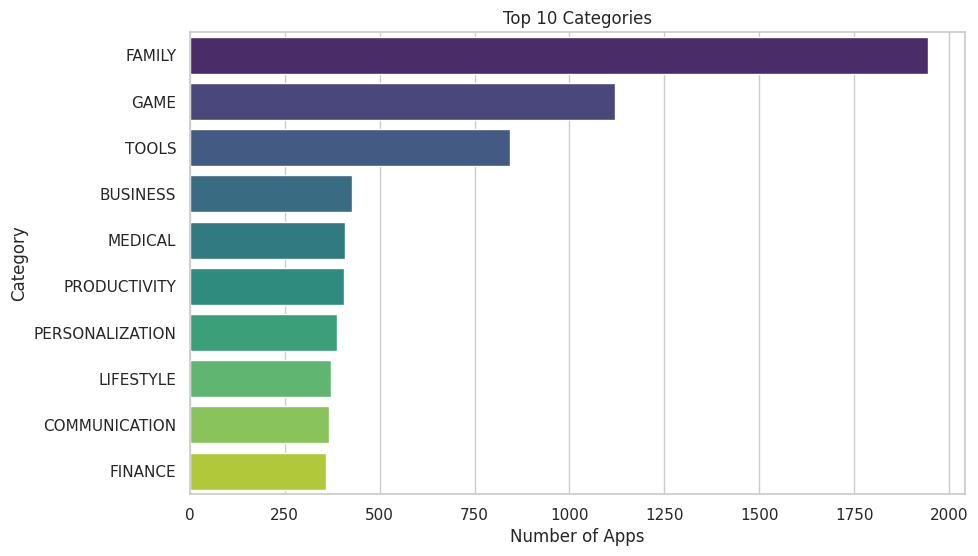

In [25]:
# Get the top 10 categories
top_categories = data['Category'].value_counts().head(10)
print("Top 10 Categories:", top_categories)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='viridis')
plt.title("Top 10 Categories")
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.show()


Average Ratings by Category:
 Category
EDUCATION              4.374564
EVENTS                 4.363647
ART_AND_DESIGN         4.350462
BOOKS_AND_REFERENCE    4.311943
PERSONALIZATION        4.305620
PARENTING              4.282223
GAME                   4.277598
BEAUTY                 4.260882
HEALTH_AND_FITNESS     4.251656
SOCIAL                 4.247001
Name: Rating, dtype: float64


/tmp/ipython-input-2244723881.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis')


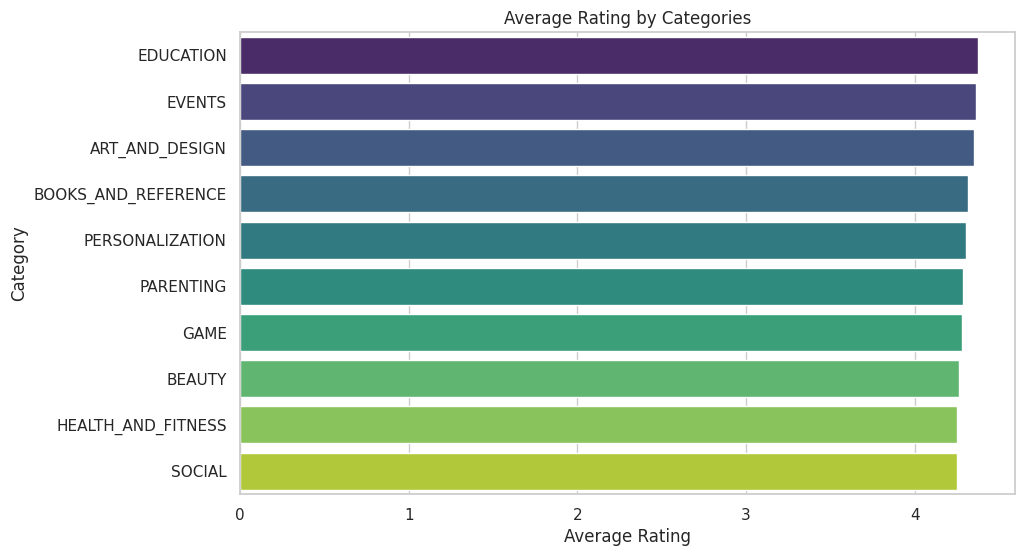

In [26]:
avg_rating = data.groupby('Category')['Rating'].mean().sort_values(ascending=False).head(10)
print("Average Ratings by Category:\n", avg_rating)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating.values, y=avg_rating.index, palette='viridis')
plt.title("Average Rating by Categories")
plt.xlabel("Average Rating")
plt.ylabel("Category")
plt.show()

App Types:
 Type
Free    9591
Paid     765
Name: count, dtype: int64


/tmp/ipython-input-927919576.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=app_types.index, y=app_types.values, palette="coolwarm")


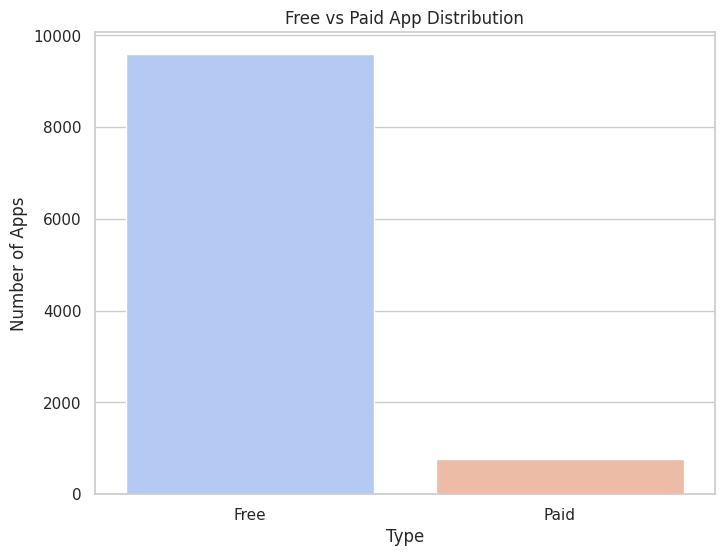

In [27]:
# Count of app types
app_types = data['Type'].value_counts()
print("App Types:\n", app_types)

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x=app_types.index, y=app_types.values, palette="coolwarm")
plt.title('Free vs Paid App Distribution')
plt.xlabel('Type')
plt.ylabel('Number of Apps')
plt.show()


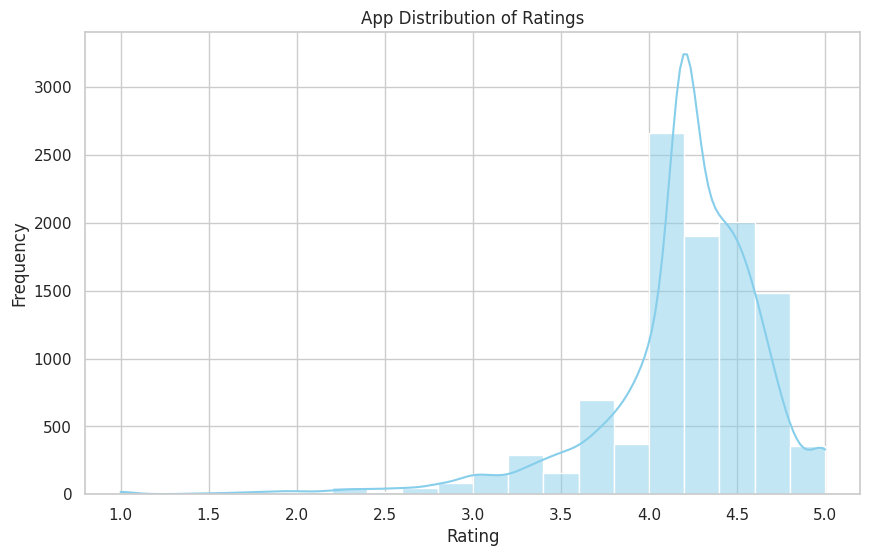

In [28]:
# Plot histogram of app ratings
plt.figure(figsize=(10,6))
sns.histplot(data['Rating'], bins=20, kde=True, color='skyblue')
plt.title("App Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


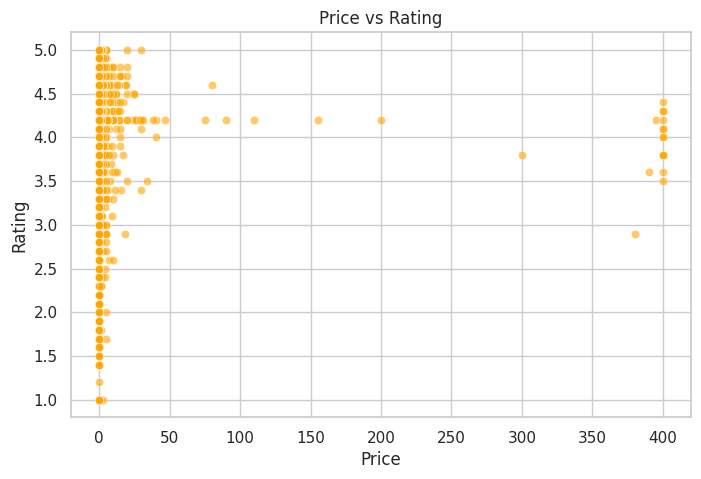

In [29]:
# Scatter plot of Price vs Rating
plt.figure(figsize=(8,5))
sns.scatterplot(x='Price', y='Rating', data=data, alpha=0.6, color='orange')
plt.title('Price vs Rating')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()


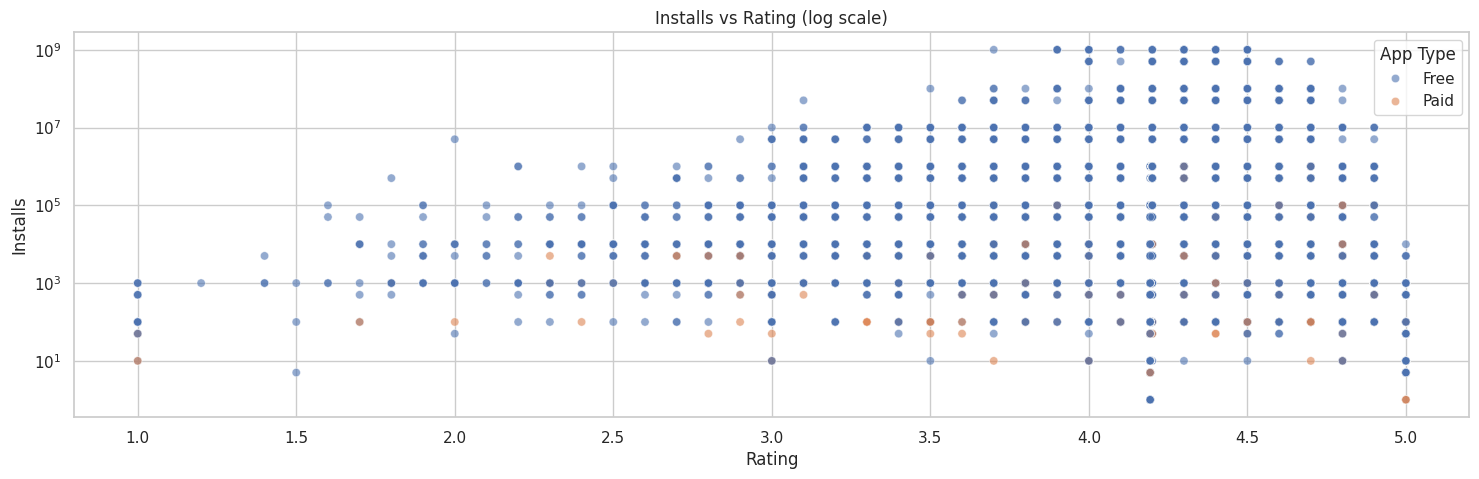

In [30]:
# Scatter plot of Installs vs Rating with log scale
plt.figure(figsize=(18,5))  # Corrected figsize
sns.scatterplot(x='Rating', y='Installs', data=data, alpha=0.6, color='green', hue='Type')
plt.xscale('linear')  # Ratings are usually linear
plt.yscale('log')      # Installs often span orders of magnitude
plt.title("Installs vs Rating (log scale)")
plt.xlabel("Rating")
plt.ylabel("Installs")
plt.legend(title="App Type")
plt.show()


Correlation Matrix:
             Rating   Reviews  Installs     Price    IsPaid
Rating    1.000000  0.068363  0.050473 -0.020559  0.034605
Reviews   0.068363  1.000000  0.634997 -0.009417 -0.041262
Installs  0.050473  0.634997  1.000000 -0.011147 -0.049513
Price    -0.020559 -0.009417 -0.011147  1.000000  0.224234
IsPaid    0.034605 -0.041262 -0.049513  0.224234  1.000000


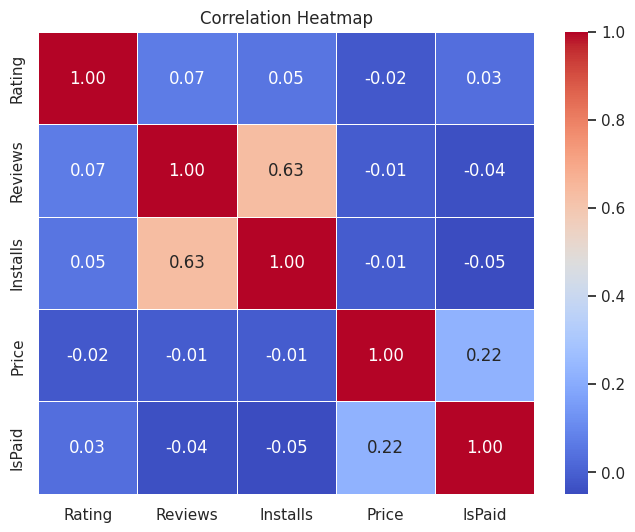

In [31]:
corr = data[['Rating', 'Reviews', 'Installs', 'Price', 'IsPaid']].corr()
print("Correlation Matrix:\n", corr)

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [32]:
data.describe().to_csv("eda_summary.csv")
print("EDA Summary Saved as eda_summary.csv")


EDA Summary Saved as eda_summary.csv


DAY 3